#Libraries



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
# EDA imports
#!pip install plotly --upgrade
#!pip install matplotlib numpy Pillow wordcloud requests
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.subplots import make_subplots
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import requests
from io import BytesIO

<div class="alert alert-block alert-info">

#[DATASET](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)


As social media usage becomes increasingly prevalent in every age group, a vast majority of citizens rely on this essential medium for day-to-day communication. Social media’s ubiquity means that cyberbullying can effectively impact anyone at any time or anywhere, and the relative anonymity of the internet makes such personal attacks more difficult to stop than traditional bullying.

On April 15th, 2020, UNICEF issued a warning in response to the increased risk of cyberbullying during the COVID-19 pandemic due to widespread school closures, increased screen time, and decreased face-to-face social interaction. The statistics of cyberbullying are outright alarming: 36.5% of middle and high school students have felt cyberbullied and 87% have observed cyberbullying, with effects ranging from decreased academic performance to depression to suicidal thoughts.

In light of all of this, this dataset contains more than 47000 tweets labelled according to the class of cyberbullying:

- Age
- Ethnicity
- Gender
- Religion
- Other type of cyberbullying
- Not cyberbullying

The data has been balanced in order to contain ~8000 of each class.

**Trigger Warning:** These tweets either describe a bullying event or are the offense themselves, therefore explore it to the point where you feel comfortable.

In [ ]:
file_path = "/content/cyberbullying_tweets.csv"
data = pd.read_csv(file_path)
print(data.shape)

(47692, 2)


In [ ]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:

z = {'not_cyberbullying': 'Not Cyberbullying', 'age': 'Age', 'religion': 'Religion', 'ethnicity': 'Ethnicity', 'gender': 'Gender', 'other_cyberbullying': 'Other Cyberbullying'}


fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(
        x=data.cyberbullying_type.map(z).unique(),
        y=data.cyberbullying_type.value_counts().values,
        marker=dict(colorscale='Jet', color=data.cyberbullying_type.value_counts().values),
    )
)

fig.update_layout(
    title='Bullying Types',
    showlegend=False,
    height=400,
    width=600
)

fig.show(renderer='colab')
display(fig)


['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']


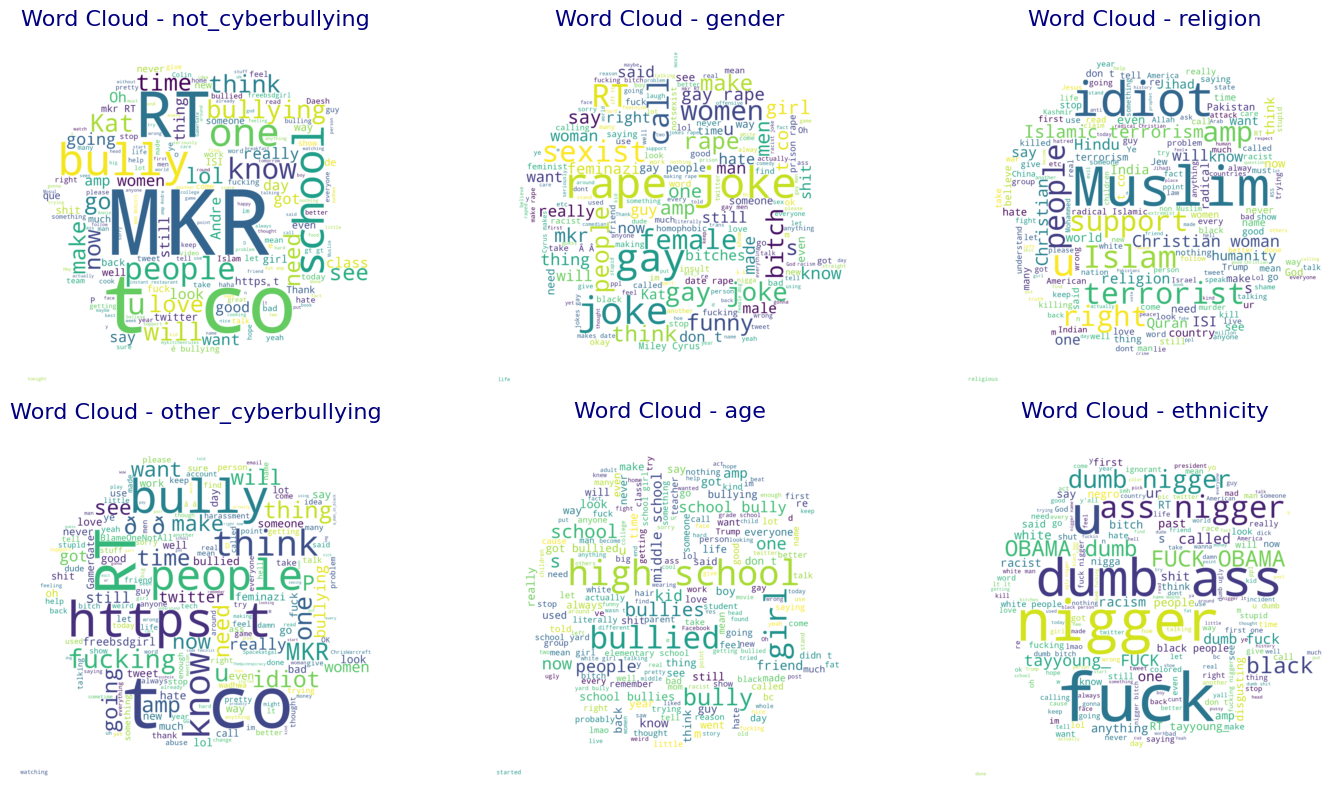

In [ ]:
categories = data['cyberbullying_type'].unique()
print(categories)
plt.figure(figsize=(15, 8))
for i, category in enumerate(categories):
    text = data[data['cyberbullying_type'] == category]['tweet_text'].str.cat(sep=' ')
    mask_url = 'https://media.istockphoto.com/id/1301795370/vector/concept-victim-of-bullying-cyber-harassment-cyberstalking-portrait-of-woman-with-frustration.jpg?s=2048x2048&w=is&k=20&c=eAWFdAWd_VYXCvCa_iuP8TV9t3sOuaZqt2NK-ws6M9w='
    mask = np.array(Image.open(BytesIO(requests.get(mask_url).content)))
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask).generate(text)
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - {category}', fontsize=16, color='navy')
    plt.axis('off')
plt.tight_layout()
plt.show()

Preprocessing Data

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

tweet_text            0
cyberbullying_type    0
dtype: int64


In [ ]:
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
data.duplicated().sum()

36

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
import string
data['processed_tweets']= data["tweet_text"].str.lower()
data.head()

,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"@jason_gio meh. :p thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,@rudhoeenglish this is an isis account pretend...


In [ ]:
def remove_punctuations(text):
  punctuations=string.punctuation
  return text.translate(str.maketrans("","",punctuations))
data['processed_tweets']=data['processed_tweets'].apply(lambda x: remove_punctuations(x))
data.head()

,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but no...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...


In [ ]:
import re
def remove_spl_chars(text):
  text=re.sub("[^a-zA-Z0-9]"," ",text)
  text=re.sub('\s+'," ",text)
  return text
data['processed_tweets']=data['processed_tweets'].apply(lambda x: remove_spl_chars(x))
data.head()

,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words katandandre your food was crapi...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks a classy whore or more red velv...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks for the heads up but not...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish this is an isis account pretendi...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stop_words = set(stopwords.words('english')) #to remove duplicates
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stop_words])
data['processed_tweets']=data['processed_tweets'].apply(lambda x: remove_stopwords(x))
data.head()

,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks heads concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isis account pretending kurdish ...


In [ ]:
from collections import Counter
word_count=Counter()
for text in data['processed_tweets']:
  for word in text.split():
    word_count[text]+=1
word_count.most_common(10)

[('feminazi actual word denot nasharchy job means protecting people even people dont agree withlike barely cooked anything entr e mkr rt kf like community fostering jerks prevents users adopting communitys code much technical problem almost time jamesgweenwood shock youre bullying lionlioneateat yeah someone dmed screenshot meh let idea even egregious cases harassment definitely need able respond appropriately toxicity isnt happened httptcozptrtsyfiv nibelsnarfabarf srhbutts grimachu really funny assumptions make works much wrong lack selfawareness wadhwa right staggering hilarious stopwadhwa2015 hahahaha httptcojrpkjcnvh9 going better finale met mother one way another trump evil cabal criminals caught lying ass impeached wont b moment soon saintneko love rock band p dedicate thread swiftonsecurity rt srhbutts women gdc share heartbreaking stories gamergate chooses respond httptcoq7abw89vqn slainvfr try still make mistakes hard think president needs congressional approval idiot rt empr

In [ ]:
rare_words=set(word for (word,wc)in word_count.most_common()[:-10:-1])
def remove_rare_words(text):
  return " ".join([word for word in text.split() if word not in rare_words])
data['processed_tweets']=data['processed_tweets'].apply(lambda x: remove_rare_words(x))
data.head()

,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks heads concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isis account pretending kurdish ...


In [ ]:
import re
def remove_urls(text):

    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    text_without_urls = url_pattern.sub('', text)

    return text_without_urls
data['processed_tweets'] = data['processed_tweets'].apply(lambda x: remove_urls(x))
data.head()


,tweet_text,cyberbullying_type,processed_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thanks heads concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isis account pretending kurdish ...


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # ADJ
    elif treebank_tag.startswith('V'):
        return 'v'  # VERB
    elif treebank_tag.startswith('N'):
        return 'n'  # NOUN
    elif treebank_tag.startswith('R'):
        return 'r'  # ADV
    else:
        return 'n'

lemmatizer = WordNetLemmatizer()

data['processed_tweets'] = data['processed_tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos_tag([word])[0][1])) for word in x.split()]))


data.tail()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet_text,cyberbullying_type,processed_tweets
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl arent expect anything depend anythin...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch get bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt therealexel youre nigger fuck unfo...
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,bro u gotta chill rt chillshrammy dog fuck kp ...


In [ ]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data.cyberbullying_type.values)
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweets'],data['cyberbullying_type'], stratify = y, test_size=0.2, random_state=42)
print(y)

[3 3 3 ... 1 1 1]


**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


tfidf_vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)




##KNN


KNN Accuracy: 0.2716114141838019


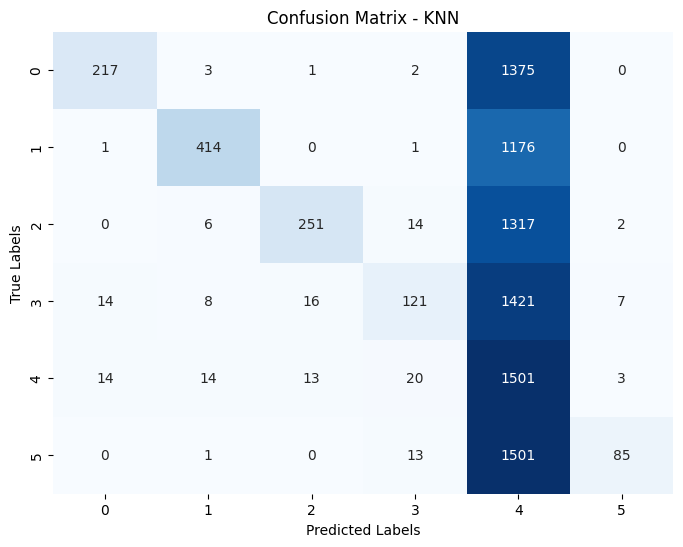

Classification Report:
                     precision    recall  f1-score   support

           religion       0.88      0.14      0.24      1598
                age       0.93      0.26      0.41      1592
             gender       0.89      0.16      0.27      1590
          ethnicity       0.71      0.08      0.14      1587
  not_cyberbullying       0.18      0.96      0.30      1565
other_cyberbullying       0.88      0.05      0.10      1600

           accuracy                           0.27      9532
          macro avg       0.74      0.27      0.24      9532
       weighted avg       0.75      0.27      0.24      9532



In [ ]:
#tfidf

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)
knn_y_pred = knn_classifier.predict(X_test_tfidf)
accuracy_knn_tfidf = metrics.accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy_knn_idf}")


conf_matrix = confusion_matrix(y_test, knn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, knn_y_pred, target_names=['religion', 'age', 'gender', 'ethnicity', 'not_cyberbullying', 'other_cyberbullying']))



KNN Accuracy: 0.7039446076374318


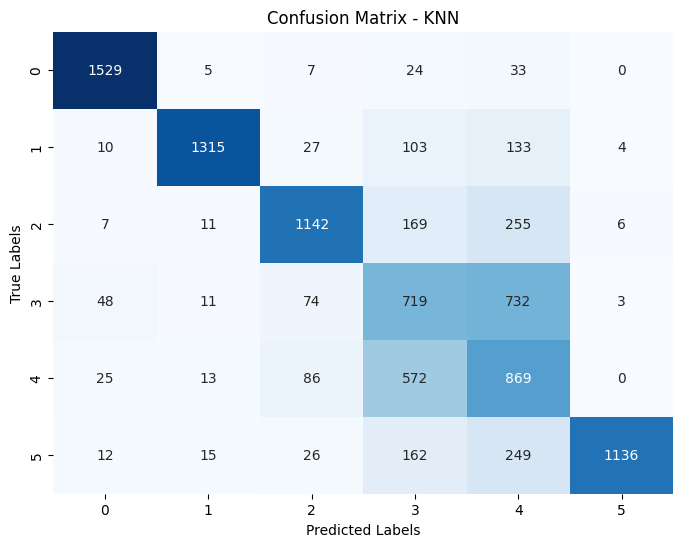

Classification Report:
                     precision    recall  f1-score   support

           religion       0.94      0.96      0.95      1598
                age       0.96      0.83      0.89      1592
             gender       0.84      0.72      0.77      1590
          ethnicity       0.41      0.45      0.43      1587
  not_cyberbullying       0.38      0.56      0.45      1565
other_cyberbullying       0.99      0.71      0.83      1600

           accuracy                           0.70      9532
          macro avg       0.75      0.70      0.72      9532
       weighted avg       0.75      0.70      0.72      9532



In [ ]:
#bow

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_bow, y_train)
knn_y_pred = knn_classifier.predict(X_test_bow)

accuracy_knn_bow = metrics.accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {accuracy_knn_bow}")

conf_matrix = confusion_matrix(y_test, knn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score and display classification report
print("Classification Report:")
print(classification_report(y_test, knn_y_pred, target_names=['religion', 'age', 'gender', 'ethnicity', 'not_cyberbullying', 'other_cyberbullying']))



#Logistic Regression

In [ ]:
#tfidf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Logistic Regression with TFIDF features:")
from sklearn.preprocessing import StandardScaler

logreg_tfidf = LogisticRegression(solver='saga', max_iter=1000)
logreg_tfidf.fit(X_train_tfidf, y_train)
y_pred = logreg_tfidf.predict(X_test_tfidf)

accuracy_logreg_tfidf = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("SVM with tfidf")
print(f"Accuracy: {accuracy_logreg_tfidf:.2f}")
print("Classification Report:\n", classification_rep)


Logistic Regression with TFIDF features:
SVM with tfidf
Accuracy: 0.83
Classification Report:
                      precision    recall  f1-score   support

                age       0.93      0.98      0.96      1598
          ethnicity       0.97      0.96      0.97      1592
             gender       0.91      0.84      0.87      1590
  not_cyberbullying       0.60      0.56      0.58      1587
other_cyberbullying       0.59      0.65      0.62      1565
           religion       0.95      0.95      0.95      1600

           accuracy                           0.83      9532
          macro avg       0.83      0.82      0.82      9532
       weighted avg       0.83      0.83      0.83      9532



In [ ]:
#bow
print("\nLogistic Regression with BOW features:")
logreg_bow = LogisticRegression(solver='saga', max_iter=1000)
logreg_bow.fit(X_train_bow, y_train)
y_pred = logreg_bow.predict(X_test_bow)

accuracy_logreg_bow = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_logreg_bow:.2f}")
print("Classification Report:\n", classification_rep)



Logistic Regression with BOW features:
Accuracy: 0.82
Classification Report:
                      precision    recall  f1-score   support

                age       0.97      0.97      0.97      1598
          ethnicity       0.98      0.97      0.97      1592
             gender       0.91      0.85      0.88      1590
  not_cyberbullying       0.57      0.57      0.57      1587
other_cyberbullying       0.58      0.64      0.61      1565
           religion       0.97      0.94      0.95      1600

           accuracy                           0.82      9532
          macro avg       0.83      0.82      0.83      9532
       weighted avg       0.83      0.82      0.83      9532



##Support Vector Machines


In [ ]:
#tfidf
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

y_pred = svm_classifier.predict(X_test_tfidf)

accuracy_svm_tfidf = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("SVM with tfidf")
print(f"Accuracy: {accuracy_svm_tfidf:.2f}")
print("Classification Report:\n", classification_rep)


SVM with tfidf
Accuracy: 0.82
Classification Report:
                      precision    recall  f1-score   support

                age       0.95      0.97      0.96      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.91      0.84      0.87      1590
  not_cyberbullying       0.60      0.51      0.55      1587
other_cyberbullying       0.57      0.69      0.63      1565
           religion       0.96      0.95      0.95      1600

           accuracy                           0.82      9532
          macro avg       0.83      0.82      0.82      9532
       weighted avg       0.83      0.82      0.82      9532



In [ ]:
#bow
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_bow, y_train)

y_pred = svm_classifier.predict(X_test_bow)

accuracy_svm_bow = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("SVM with bow")
print(f"Accuracy: {accuracy_svm_bow:.2f}")
print("Classification Report:\n", classification_rep)

SVM with bow
Accuracy: 0.83
Classification Report:
                      precision    recall  f1-score   support

                age       0.98      0.97      0.97      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.91      0.83      0.87      1590
  not_cyberbullying       0.68      0.47      0.55      1587
other_cyberbullying       0.57      0.83      0.68      1565
           religion       0.96      0.94      0.95      1600

           accuracy                           0.83      9532
          macro avg       0.85      0.83      0.83      9532
       weighted avg       0.85      0.83      0.83      9532



##Naive Bayes


In [ ]:
#tfidf
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy_nb_tfidf = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Multinomial Naive Bayes with tfidf")
print(f"Accuracy: {accuracy_nb_tfidf:.2f}")
print("Classification Report:\n", classification_rep)




Multinomial Naive Bayes with tfidf
Accuracy: 0.76
Classification Report:
                      precision    recall  f1-score   support

                age       0.70      0.99      0.82      1598
          ethnicity       0.84      0.90      0.87      1592
             gender       0.83      0.86      0.84      1590
  not_cyberbullying       0.67      0.35      0.46      1587
other_cyberbullying       0.65      0.47      0.54      1565
           religion       0.78      0.97      0.87      1600

           accuracy                           0.76      9532
          macro avg       0.75      0.75      0.73      9532
       weighted avg       0.75      0.76      0.73      9532



In [ ]:
#bow
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

y_pred = nb_classifier.predict(X_test_bow)

accuracy_nb_bow = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Multinomial Naive Bayes with bow")
print(f"Accuracy: {accuracy_nb_bow:.2f}")
print("Classification Report:\n", classification_rep)

Multinomial Naive Bayes with bow
Accuracy: 0.77
Classification Report:
                      precision    recall  f1-score   support

                age       0.74      0.99      0.85      1598
          ethnicity       0.85      0.92      0.88      1592
             gender       0.83      0.86      0.84      1590
  not_cyberbullying       0.68      0.36      0.47      1587
other_cyberbullying       0.65      0.51      0.57      1565
           religion       0.80      0.98      0.88      1600

           accuracy                           0.77      9532
          macro avg       0.76      0.77      0.75      9532
       weighted avg       0.76      0.77      0.75      9532



##Random Forest


In [ ]:
#tfidf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)

accuracy_rf_tfid = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Random Forest with tfidf")
print(f"Accuracy : {accuracy_rf_tfid:.2f}")
print("Classification Report:\n", classification_rep)

Random Forest with tfidf
Accuracy : 0.82
Classification Report:
                      precision    recall  f1-score   support

                age       0.97      0.98      0.97      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.91      0.84      0.87      1590
  not_cyberbullying       0.57      0.50      0.53      1587
other_cyberbullying       0.55      0.65      0.60      1565
           religion       0.95      0.96      0.96      1600

           accuracy                           0.82      9532
          macro avg       0.82      0.82      0.82      9532
       weighted avg       0.82      0.82      0.82      9532



In [ ]:
#bow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_bow, y_train)

y_pred = rf_classifier.predict(X_test_bow)

accuracy_rf_bow = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Random Forest with bow")
print(f"Accuracy: {accuracy_rf_bow:.2f}")
print("Classification Report:\n", classification_rep)

Random Forest with bow
Accuracy: 0.81
Classification Report:
                      precision    recall  f1-score   support

                age       0.98      0.97      0.97      1598
          ethnicity       0.97      0.97      0.97      1592
             gender       0.88      0.85      0.87      1590
  not_cyberbullying       0.56      0.49      0.52      1587
other_cyberbullying       0.54      0.63      0.58      1565
           religion       0.96      0.96      0.96      1600

           accuracy                           0.81      9532
          macro avg       0.82      0.81      0.81      9532
       weighted avg       0.82      0.81      0.81      9532



##XGBOOST


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming y contains your string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



In [ ]:
#tfidf
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train_encoded)
y_pred = xgb_classifier.predict(X_test_tfidf)

accuracy_xgb_tfidf = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)
print("XGBoost with tfidf")
print(f"Accuracy: {accuracy_xgb_tfidf:.2f}")
print("Classification Report:\n", classification_rep)



XGBoost with tfidf
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1598
           1       0.98      0.97      0.98      1592
           2       0.92      0.84      0.88      1590
           3       0.67      0.47      0.55      1587
           4       0.57      0.83      0.67      1565
           5       0.97      0.94      0.96      1600

    accuracy                           0.84      9532
   macro avg       0.85      0.84      0.84      9532
weighted avg       0.85      0.84      0.84      9532



In [ ]:
#bow
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_bow, y_train_encoded)

y_pred = xgb_classifier.predict(X_test_bow)

accuracy_xgb_bow = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)
print("XGBoost with bow")
print(f"Accuracy: {accuracy_xgb_bow:.2f}")
print("Classification Report:\n", classification_rep)


XGBoost with bow
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1598
           1       0.98      0.97      0.97      1592
           2       0.92      0.85      0.88      1590
           3       0.70      0.45      0.55      1587
           4       0.57      0.85      0.69      1565
           5       0.97      0.95      0.96      1600

    accuracy                           0.84      9532
   macro avg       0.85      0.84      0.84      9532
weighted avg       0.86      0.84      0.84      9532



##Comparison


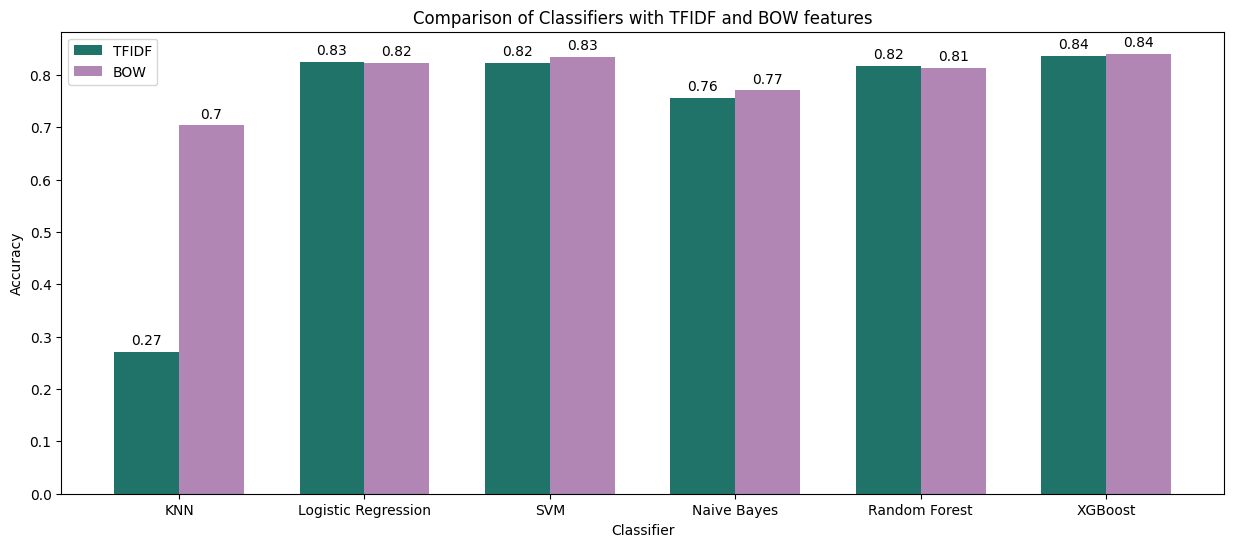

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['KNN', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'XGBoost']
accuracy_tfidf = [accuracy_knn_tfidf, accuracy_logreg_tfidf, accuracy_svm_tfidf, accuracy_nb_tfidf, accuracy_rf_tfid, accuracy_xgb_tfidf]
accuracy_bow = [accuracy_knn_bow, accuracy_logreg_bow, accuracy_svm_bow, accuracy_nb_bow, accuracy_rf_bow, accuracy_xgb_bow]

bar_width = 0.35
index = np.arange(len(classifiers))

fig, ax = plt.subplots(figsize=(15, 6))


tfidf_color = '#207368'
bow_color = '#b185b4'

rects1 = ax.bar(index - bar_width/2, accuracy_tfidf, bar_width, label='TFIDF', color=tfidf_color)
rects2 = ax.bar(index + bar_width/2, accuracy_bow, bar_width, label='BOW', color=bow_color)

ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Classifiers with TFIDF and BOW features')
ax.set_xticks(index)
ax.set_xticklabels(classifiers)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()



In [ ]:
#Tuning XGBooster
xgb_classifier = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    gamma=0.1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,

)

xgb_classifier.fit(
    X_train_bow, y_train_encoded
)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBoost with bow and tuning
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1598
           1       0.98      0.97      0.97      1592
           2       0.92      0.85      0.88      1590
           3       0.69      0.47      0.56      1587
           4       0.58      0.84      0.69      1565
           5       0.97      0.95      0.96      1600

    accuracy                           0.84      9532
   macro avg       0.85      0.84      0.84      9532
weighted avg       0.85      0.84      0.84      9532



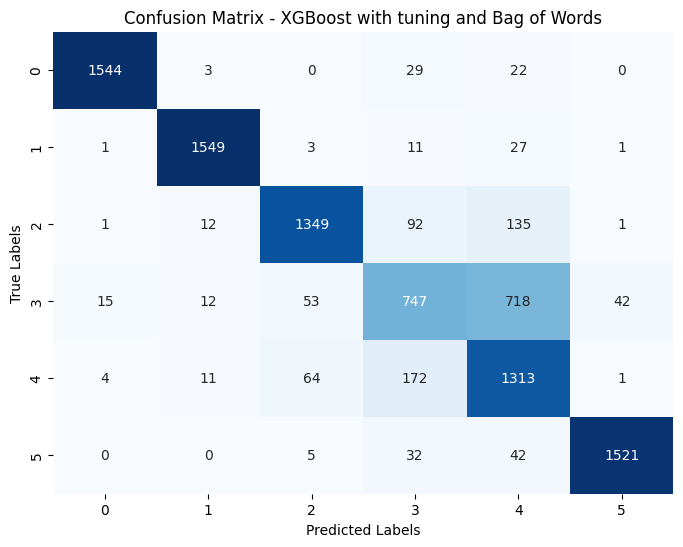

In [ ]:
y_pred = xgb_classifier.predict(X_test_bow)

accuracy_xgb_bow_tune = accuracy_score(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)
print("XGBoost with bow and tuning")
print(f"Accuracy: {accuracy_xgb_bow_tune:.2f}")
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost with tuning and Bag of Words')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()